image is from ghibli.jp


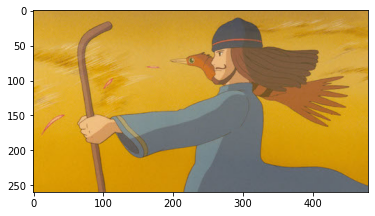

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
from matplotlib.patches import Rectangle

with open("test.jpg", "rb") as f:
    img = np.asarray(Image.open(f))

print("image is from ghibli.jp")
plt.imshow(img)

In [2]:

def add_bbox(image,
             bboxes):
    fig, ax = plt.subplots()
    if torch.is_tensor(image):
        image = image.permute(1, 2, 0).numpy()
    if torch.is_tensor(bboxes):
        bboxes = [bbox.numpy() for bbox in bboxes.unbind(0)]
    ax.imshow(image)
    for bbox in bboxes:
        left, top, right, bottom = bbox
        #top, left, bottom, right = bbox
        ax.add_patch(Rectangle((left, top), right-left, bottom-top,
                               linewidth=2, edgecolor=(0, 1, 0, 1), facecolor="none"))
    return ax


bbox = torch.tensor([[240, 40, 310, 100]], dtype=torch.float)

<AxesSubplot:>

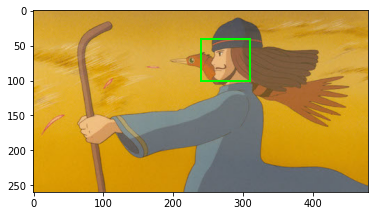

In [3]:
add_bbox(img, [[240, 40, 310, 100]])

/Users/mosko/.miniconda/envs/homura/lib/python3.8/site-packages/torchvision/transforms/functional.py:74: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1607370249289/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


<AxesSubplot:>

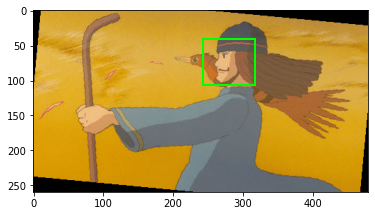

In [4]:
from homura.vision.transforms import RandomRotation

add_bbox(*RandomRotation(30,target_type="bbox")(img, bbox))


<AxesSubplot:>

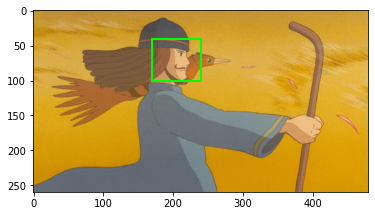

In [5]:
from homura.vision.transforms import RandomHorizontalFlip

add_bbox(*RandomHorizontalFlip(0.9, target_type="bbox")(img, bbox))


<AxesSubplot:>

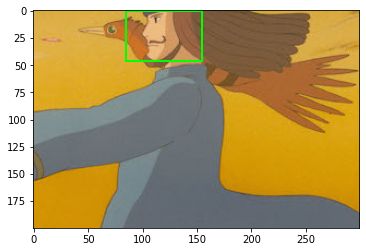

In [6]:
from homura.vision.transforms import RandomCrop

add_bbox(*RandomCrop((200, 300), target_type="bbox")(img, bbox))

<AxesSubplot:>

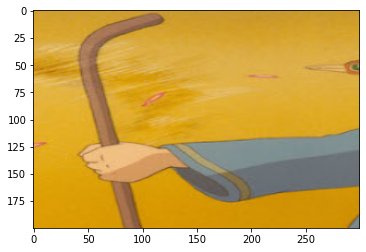

In [7]:
from homura.vision.transforms import RandomResizedCrop

add_bbox(*RandomResizedCrop((200, 300), target_type="bbox")(img, bbox))

<AxesSubplot:>

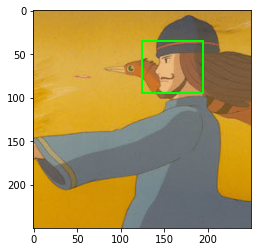

In [8]:
from homura.vision.transforms import CenterCrop

add_bbox(*CenterCrop(250, target_type="bbox")(img, bbox))

<AxesSubplot:>

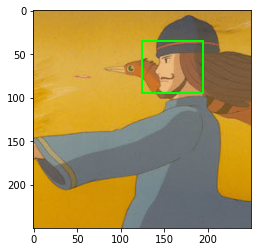

In [9]:
add_bbox(*(CenterCrop(250, target_type="bbox") * RandomHorizontalFlip(p=0.9, target_type="bbox"))(img, bbox))

<AxesSubplot:>

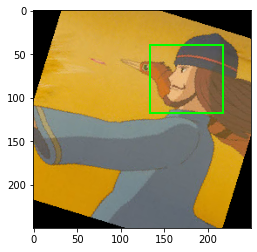

In [10]:
add_bbox(*(RandomRotation(30, target_type="bbox") * CenterCrop(250, target_type="bbox") * RandomHorizontalFlip(p=0.9, target_type="bbox"))(img, bbox))